# Project Name: Melbourne Housing Prediction
The main aim of this project is to predict the house price based on various features

# Loading Packages

In [1]:
import pandas as pd
import numpy as np   ## For mathematical calculations
import seaborn as sns   # For data visualization 
import matplotlib.pyplot as plt  # For plotting graphs 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data1=pd.read_csv('Melbourne_housing_FULL.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [3]:
data1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:

## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data1.columns if data1[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(data1[feature].isnull().mean(), 4),  ' % missing values')

Price 0.2183  % missing values
Bedroom2 0.2357  % missing values
Bathroom 0.236  % missing values
Car 0.2504  % missing values
Landsize 0.3388  % missing values
BuildingArea 0.6058  % missing values
YearBuilt 0.5539  % missing values
CouncilArea 0.0001  % missing values
Lattitude 0.2288  % missing values
Longtitude 0.2288  % missing values
Regionname 0.0001  % missing values
Propertycount 0.0001  % missing values


From the above it can be concluded that we have few missing data in Price,Bedroom, Bathroom, Car and Landsize, Longitude and Latitude columns. here are so many missing values in Building Area and Year Built features and here Regionname ,Propertycount have less missing values. In next step let's drop the price of missing values

In [5]:
### since our target variable is price, it makes sense to drop rows for Price columns wher price values are missing
df=data1.dropna(subset=["Price"])

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [7]:
#percntage of missing values
(df.isnull().sum()/len(df))*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

Here we need to replace these nan values with something meaningful which we will do in the Feature Engineering section

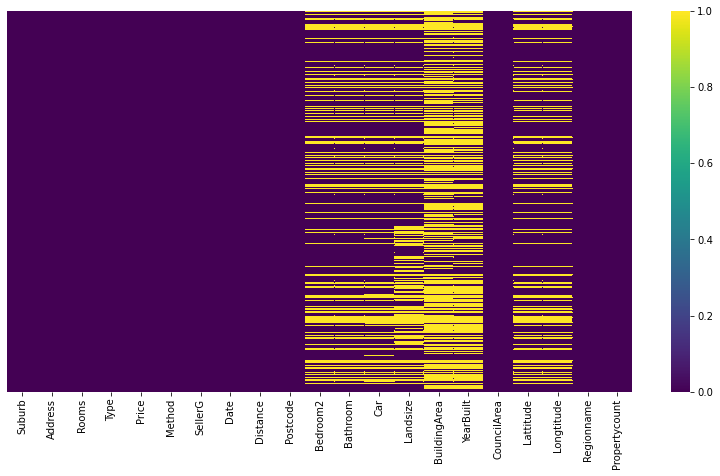

In [8]:
#Visualizing Missing Data
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(), yticklabels=False,cmap='viridis')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.0000,3.00000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.0000,870000.00000,1.295000e+06,1.120000e+07
Distance,27246.0,1.128028e+01,6.787469,0.00000,6.4000,10.50000,1.400000e+01,4.810000e+01
Postcode,27246.0,3.113796e+03,111.139676,3000.00000,3046.0000,3088.00000,3.153000e+03,3.978000e+03
Bedroom2,20806.0,3.046237e+00,0.955122,0.00000,2.0000,3.00000,4.000000e+00,2.000000e+01
Bathroom,20800.0,1.591683e+00,0.700880,0.00000,1.0000,1.00000,2.000000e+00,9.000000e+00
Car,20423.0,1.715370e+00,0.994216,0.00000,1.0000,2.00000,2.000000e+00,1.800000e+01
Landsize,17982.0,5.934889e+02,3757.266429,0.00000,219.0000,512.00000,6.640000e+02,4.330140e+05
BuildingArea,10656.0,1.568346e+02,449.222791,0.00000,100.0000,133.00000,1.820000e+02,4.451500e+04
YearBuilt,12084.0,1.966609e+03,36.762373,1196.00000,1950.0000,1970.00000,2.000000e+03,2.019000e+03


# Exploratory data analysis
lets explore the data

# 1.UniVariate Analysis
In this section we will do Univariate Analysis.It is simplest form of analyzing data where we examine each varible individually

# 1.1 Numerical Values

In [10]:
#List of numerical values
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 13
the numerical features: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [11]:
#visualize numerical_features
df[numerical_features].head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
5,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
##Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 4


In [13]:
discrete_feature

['Rooms', 'Bedroom2', 'Bathroom', 'Car']

In [14]:
df[discrete_feature].head()

,Rooms,Bedroom2,Bathroom,Car
1,2,2.0,1.0,1.0
2,2,2.0,1.0,0.0
4,3,3.0,2.0,0.0
5,3,3.0,2.0,1.0
6,4,3.0,1.0,2.0


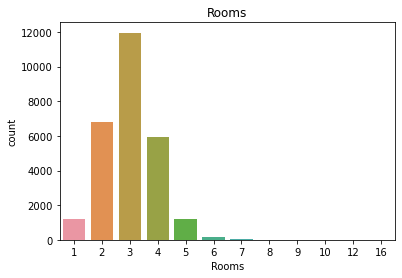

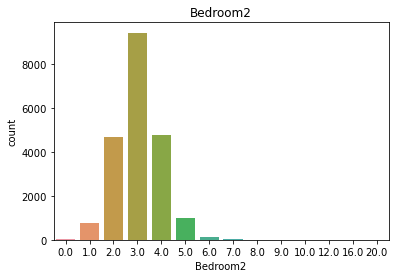

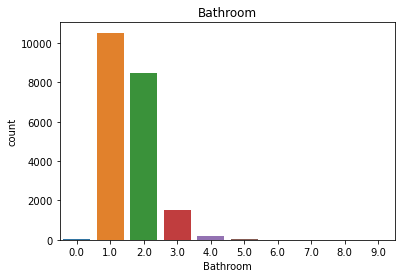

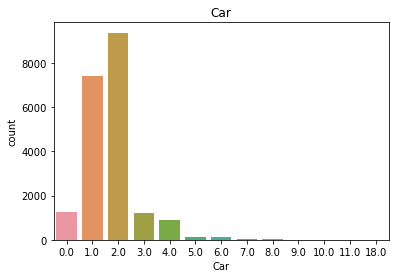

In [15]:
## Lets Find the discrete feature by visualizing data

for feature in discrete_feature:
    df1=df.copy()
    sns.countplot(df1[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [16]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


In [17]:
df[continuous_feature].head()

,Price,Distance,Postcode,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,1480000.0,2.5,3067.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,1035000.0,2.5,3067.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,1465000.0,2.5,3067.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
5,850000.0,2.5,3067.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
6,1600000.0,2.5,3067.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


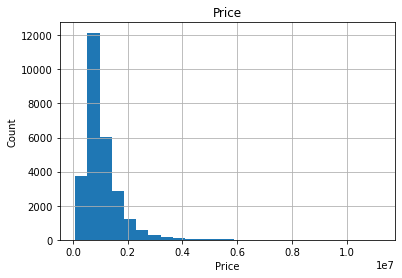

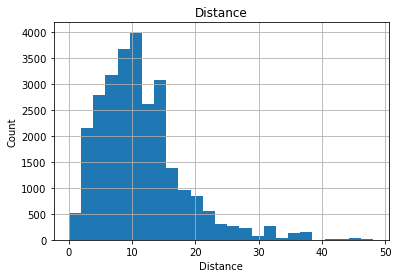

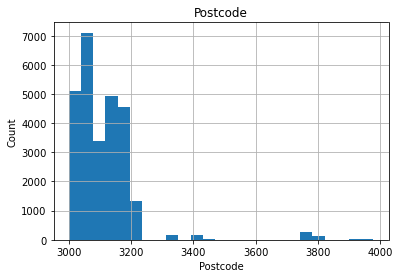

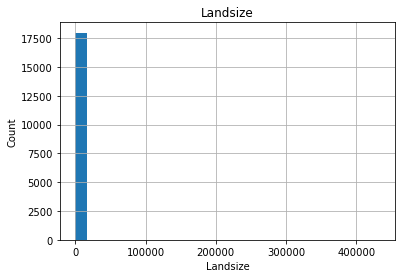

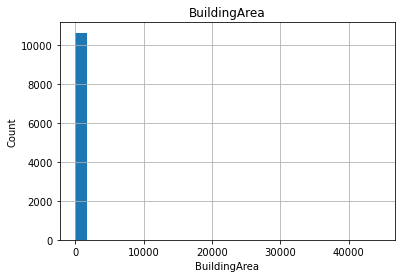

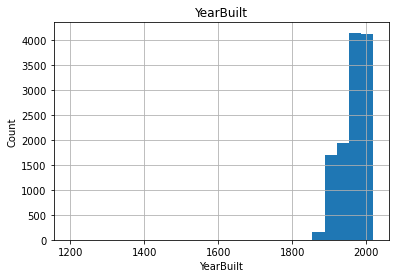

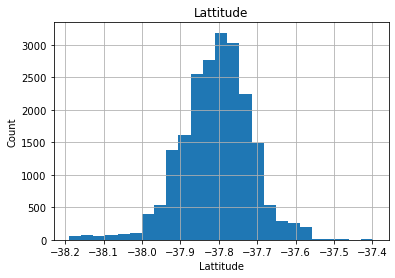

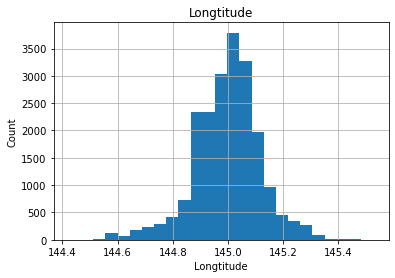

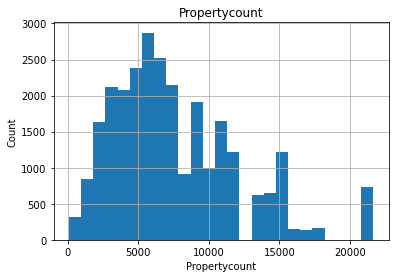

In [18]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    df1=df.copy()
    df1[feature].hist(bins=25)
    #plt.figure(figsize=(10,5))
    #sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

 Here the above all variables have a different scale, there are many outliers for most of them and no one seem really close to normality. These observations will come useful later when I will scale my features.

# Outliers

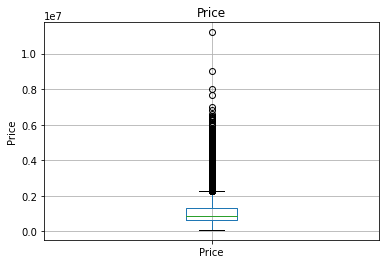

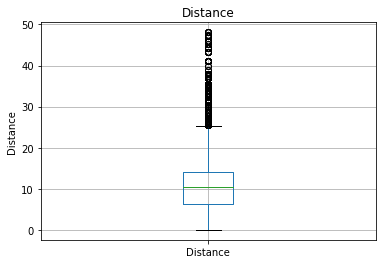

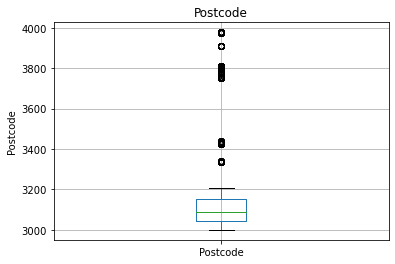

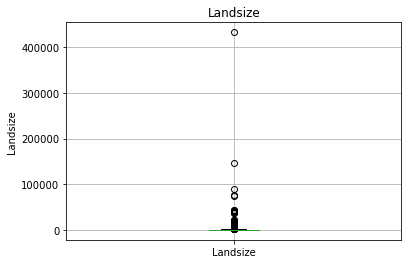

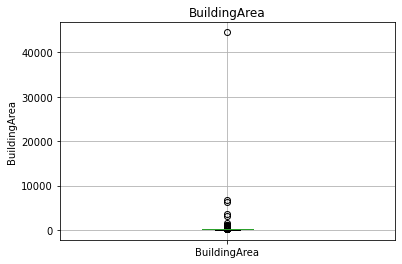

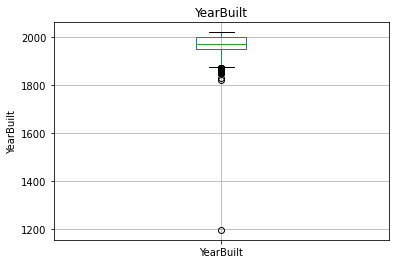

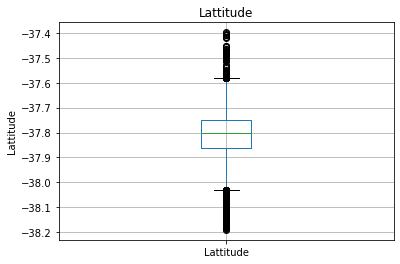

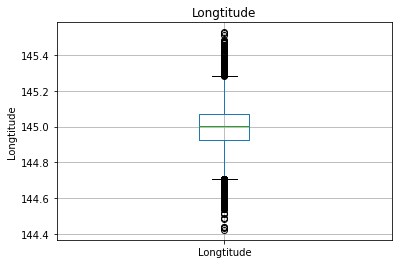

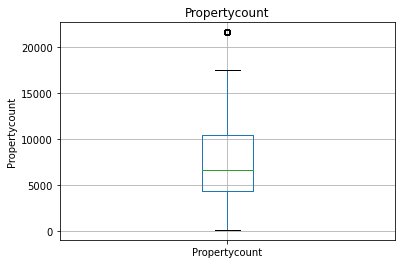

In [19]:
for feature in continuous_feature:
    df1=df.copy()
    df1.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

# 1.2 Categorical Features

In [20]:
#list of categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [21]:
df[categorical_features].head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan


In [22]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Suburb and number of categories are 345
The feature is Address and number of categories are 26751
The feature is Type and number of categories are 3
The feature is Method and number of categories are 5
The feature is SellerG and number of categories are 349
The feature is Date and number of categories are 78
The feature is CouncilArea and number of categories are 34
The feature is Regionname and number of categories are 9


In [23]:
#lets find the Suburb unique values
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [24]:
df['Suburb'].value_counts()

Reservoir         727
Bentleigh East    493
Richmond          439
Preston           415
Brunswick         387
                 ... 
Coldstream          1
Wildwood            1
Botanic Ridge       1
Lysterfield         1
Monbulk             1
Name: Suburb, Length: 345, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

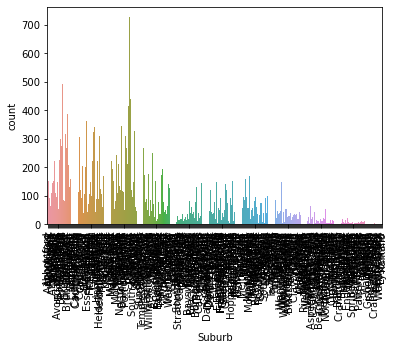

In [25]:
#lets visualize the Suburb column
sns.countplot('Suburb',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

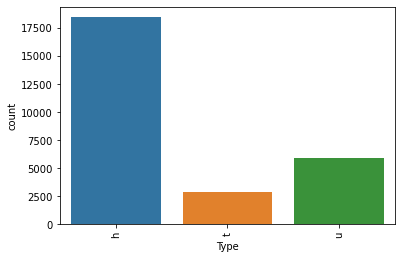

In [26]:
#Now lets check the count of the Type in the visual graph
sns.countplot('Type',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

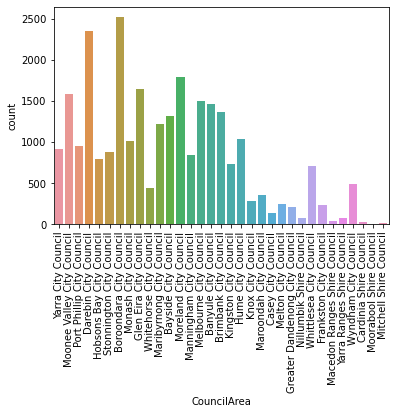

In [27]:
##Now lets check the count of the CouncilArea in the visual graph
sns.countplot('CouncilArea',data=df)
plt.xticks(rotation=90)

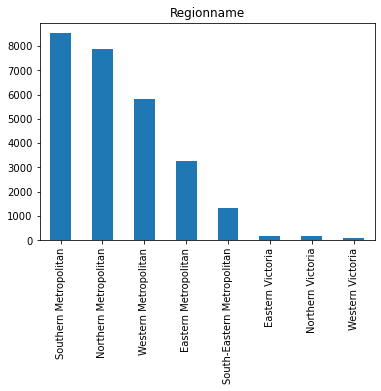

In [28]:
#Now lets check the count of the Reginname in the visual graph
df['Regionname'].value_counts(normalize=False).plot.bar(title='Regionname')
plt.show()

After looking at every varible individually in univariate analysis,we will now explore again with respect to target varible

# 2. BiVariate Analysis


In [29]:
#Check the type of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   SellerG        27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Bedroom2       20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Lattitude      20993 non-null  float64
 18  Longti


There is something wrong with data types. Let's change that. For example, there is no reason why postcode is considered as a float while it's clearly a category. I'll take the time to change all the problematic types, one by one
- change Bathroom and Car to integer Series
- Postcode is a categorical variable, not a numeric one
- Yearbuilt should be an integer

In [30]:
#lets change the postcode numerical to categorical
df['Postcode']=df['Postcode'].astype('object')

In [31]:
# The above data we can notice that "Date" is also converted to category. 
# In this step we will cast date to datetime
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])
df['Date'].unique()

array(['2016-03-12T00:00:00.000000000', '2016-04-02T00:00:00.000000000',
       '2017-04-03T00:00:00.000000000', '2016-04-06T00:00:00.000000000',
       '2016-07-05T00:00:00.000000000', '2016-08-10T00:00:00.000000000',
       '2016-10-12T00:00:00.000000000', '2016-12-11T00:00:00.000000000',
       '2016-08-13T00:00:00.000000000', '2016-05-14T00:00:00.000000000',
       '2016-10-15T00:00:00.000000000', '2016-07-16T00:00:00.000000000',
       '2016-09-17T00:00:00.000000000', '2017-03-18T00:00:00.000000000',
       '2016-06-18T00:00:00.000000000', '2016-11-19T00:00:00.000000000',
       '2016-05-22T00:00:00.000000000', '2016-08-22T00:00:00.000000000',
       '2016-04-23T00:00:00.000000000', '2016-09-24T00:00:00.000000000',
       '2017-02-25T00:00:00.000000000', '2016-07-26T00:00:00.000000000',
       '2016-11-27T00:00:00.000000000', '2016-05-28T00:00:00.000000000',
       '2016-07-30T00:00:00.000000000', '2016-03-09T00:00:00.000000000',
       '2016-06-08T00:00:00.000000000', '2016-07-11

In [32]:
#extract year from date
df['Year']=df['Date'].apply(lambda x:x.year)
df['Year']

1        2016
2        2016
4        2017
5        2017
6        2016
         ... 
34852    2018
34853    2018
34854    2018
34855    2018
34856    2018
Name: Year, Length: 27247, dtype: int64

In [33]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Month']

1        3
2        4
4        4
5        4
6        4
        ..
34852    2
34853    2
34854    2
34855    2
34856    2
Name: Month, Length: 27247, dtype: int64

In [34]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
Year                      int64
Month                     int64
dtype: object

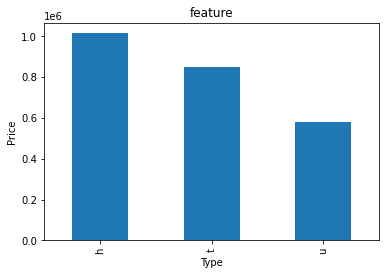

In [35]:
##lets visualize categorical variable of type vs depedent variable Price 
df.groupby('Type')['Price'].median().plot.bar()
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('feature')
plt.show()


These above plots compares that h type (house) is generally priced higher than t (townhouse) which is higher than u (unit)

In [36]:
#data subset by type
#house price
melbourne_data_h=df[df['Type']=='h']
#condo price
melbourne_data_u=df[df['Type']=='u']
#townhouse price
melbourne_data_t=df[df['Type']=='t']
#house,condo and town house price groupby year and mean
melbourne_data_h_y=melbourne_data_h.groupby('Year').mean()
melbourne_data_u_y=melbourne_data_u.groupby('Year').mean()
melbourne_data_t_y=melbourne_data_t.groupby('Year').mean()
melbourne_data_h_y.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Month
Year,,,,,,,,,,,,,
2016,3.225399,1.285387e+06,9.231611,3.135492,1.596403,1.688010,521.229496,168.004196,1947.652877,-37.803695,144.985510,7170.396766,7.454743
2017,3.351431,1.184027e+06,13.330751,3.351410,1.669099,1.905551,726.602190,179.771882,1963.333610,-37.803033,145.001316,7416.686342,7.496618
2018,3.382669,1.126411e+06,14.337591,3.401177,1.712242,1.984500,631.350233,170.508169,1966.907717,-37.793123,144.995438,7576.329498,3.894172


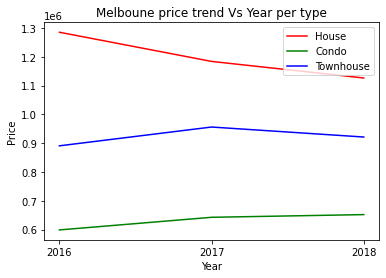

In [37]:
#lets plot House,Condo,Townhouse Prices by Yearwise
melbourne_data_h_y['Price'].plot(kind='line', color='r',label='House')
melbourne_data_u_y['Price'].plot(kind='line', color='g',label='Condo')
melbourne_data_t_y['Price'].plot(kind='line', color='b',label='Townhouse')
year_xticks=[2016,2017,2018]
plt.ylabel('Price')
plt.xticks( year_xticks)
plt.title('Melboune price trend Vs Year per type')
plt.legend()

House price was going down dramatically by 100,000 units, Condo price climb up slowly while Townhouse price kept steady. From this graph, it is anticipated that house price will keptgoing down but less slope Townhouse price will kept unchanged Condo price will increase.

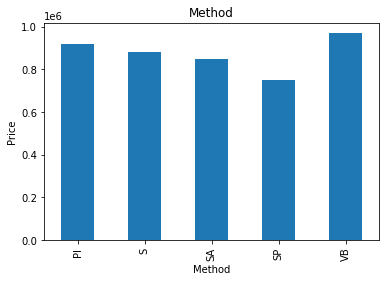

In [38]:
##lets visualize categorical variable of method vs depedent variable Price 
df.groupby('Method')['Price'].median().plot.bar()
plt.xlabel('Method')
plt.ylabel('Price')
plt.title('Method')
plt.show()


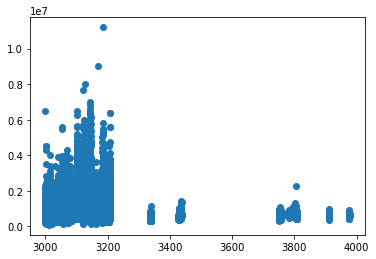

In [39]:
#plotting postcode vs price
#it definitely looks like certain postcodes are more popular and expensive
plt.scatter(df.Postcode, df.Price)

In [40]:
# set up bins
# just setting up random bins by looking at the plot above
bins = [3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000,]
df['Postcode'] = pd.cut(df.Postcode, bins)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

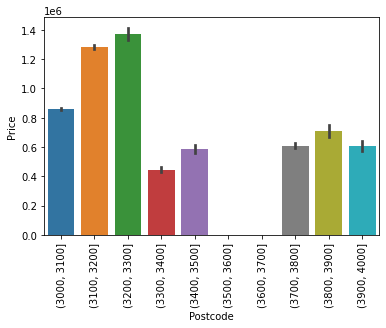

In [41]:
sns.barplot(x=df.Postcode, y=df.Price)
plt.xticks(rotation=90)

In [42]:
df.groupby('Regionname')['Price'].mean()

Regionname
Eastern Metropolitan          1.108723e+06
Eastern Victoria              7.143282e+05
Northern Metropolitan         8.614840e+05
Northern Victoria             6.190512e+05
South-Eastern Metropolitan    8.776827e+05
Southern Metropolitan         1.395928e+06
Western Metropolitan          8.376153e+05
Western Victoria              4.326068e+05
Name: Price, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

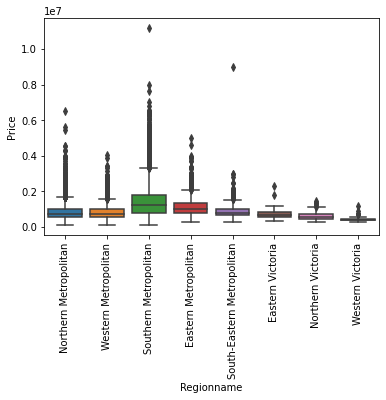

In [43]:
#lets visualize the regionname vs price
sns.boxplot(df['Regionname'],df['Price'])
plt.xticks(rotation=90)

From this above plot we can see that a larger percentage of homes are in Southern Metropolitan and that they are generally priced higher and have the most outliers.

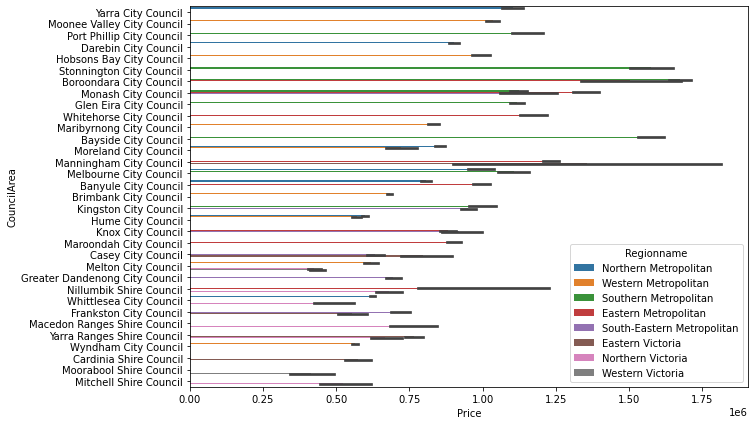

In [44]:
#Regionname impacts on Price vs Councilarea
ax = plt.subplots(figsize=(10, 7))
sns.barplot(x ='Price',y="CouncilArea", hue="Regionname", data=df)

In [45]:
#lets see the seasonal performance how the price varies in Regionname
#Prepare data for pie chart to check sales based on month in order to see which month sell most.
melbourne_data_2016=df[df['Year']==2016]
melbourne_data_2017=df[df['Year']==2017]
melbourne_data_2018=df[df['Year']==2018]
melbourne_data_2016_count=melbourne_data_2016.groupby(['Month']).count()
melbourne_data_2017_count=melbourne_data_2017.groupby(['Month']).count()
melbourne_data_2018_count=melbourne_data_2018.groupby(['Month']).count()
Comparison={2016:melbourne_data_2016.shape,2017:melbourne_data_2017.shape,2018:melbourne_data_2018.shape}
Comparison

{2016: (8054, 23), 2017: (15519, 23), 2018: (3674, 23)}

In [46]:
melbourne_data_2016_count

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
Month,,,,,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,...,2,2,0,0,2,2,2,2,2,2
3,630,630,630,630,630,630,630,630,630,626,...,496,496,302,328,630,503,503,630,630,630
4,720,720,720,720,720,720,720,720,720,710,...,558,558,338,390,720,562,562,720,720,720
5,858,858,858,858,858,858,858,858,858,853,...,655,655,355,402,858,660,660,858,858,858
6,811,811,811,811,811,811,811,811,811,809,...,627,627,354,417,811,635,635,811,811,811
7,1101,1101,1101,1101,1101,1101,1101,1101,1101,1086,...,885,885,510,590,1101,891,891,1101,1101,1101
8,1037,1037,1037,1037,1037,1037,1037,1037,1037,1027,...,813,813,438,514,1037,819,819,1037,1037,1037
9,602,602,602,602,602,602,602,602,602,595,...,483,483,271,311,602,486,486,602,602,602
10,1061,1061,1061,1061,1061,1061,1061,1061,1061,1051,...,854,854,485,556,1061,857,857,1061,1061,1061


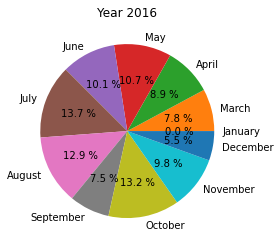

In [47]:
label_2016=['January','March','April','May','June','July','August','September','October','November','December']
plt.pie(melbourne_data_2016_count['Price'],labels=label_2016,autopct='%.1f %%')
plt.title('Year 2016')
plt.show()

In [48]:
melbourne_data_2017_count

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
Month,,,,,,,,,,,,,,,,,,,,,
1,383,383,383,383,383,383,383,383,383,383,...,276,276,122,135,383,279,279,383,383,383
2,415,415,415,415,415,415,415,415,415,413,...,334,333,188,210,415,339,339,415,415,415
3,1352,1352,1352,1352,1352,1352,1352,1352,1352,1346,...,1095,914,538,599,1352,1120,1120,1352,1352,1352
4,948,948,948,948,948,948,948,948,948,938,...,749,732,371,433,948,755,755,948,948,948
5,1263,1263,1263,1263,1263,1263,1263,1263,1263,1258,...,991,991,448,530,1263,998,998,1263,1263,1263
6,1128,1128,1128,1128,1128,1128,1128,1128,1128,1124,...,849,846,359,428,1128,856,856,1128,1128,1128
7,1547,1547,1547,1547,1547,1547,1547,1547,1547,1538,...,1279,1168,685,778,1546,1295,1295,1546,1546,1547
8,1666,1666,1666,1666,1666,1666,1666,1666,1666,1662,...,1417,1039,809,929,1666,1459,1459,1666,1666,1666
9,2326,2326,2326,2326,2326,2326,2326,2326,2326,2316,...,1850,1045,888,1006,2326,1971,1971,2326,2326,2326


Text(0.5, 1.0, 'Year 2017')

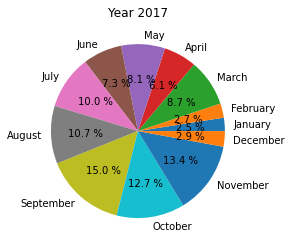

In [49]:
label_2017=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.pie(melbourne_data_2017_count['Price'],labels=label_2017,autopct='%.1f %%')
plt.title('Year 2017')

In [50]:
melbourne_data_2018_count

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year
Month,,,,,,,,,,,,,,,,,,,,,
1,23,23,23,23,23,23,23,23,23,23,...,16,14,10,10,23,16,16,23,23,23
2,1137,1137,1137,1137,1137,1137,1137,1137,1137,1133,...,739,784,406,433,1137,791,791,1137,1137,1137
3,1485,1485,1485,1485,1485,1485,1485,1485,1485,1479,...,1021,1039,490,529,1485,1071,1071,1485,1485,1485
6,624,624,624,624,624,624,624,624,623,620,...,404,260,196,224,623,427,427,623,623,624
10,405,405,405,405,405,405,405,405,405,405,...,253,199,141,151,405,272,272,405,405,405


Text(0.5, 1.0, '2018')

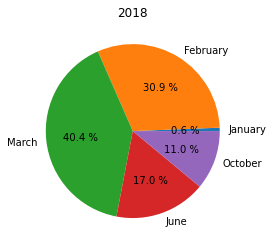

In [51]:
label_2018=['January','February','March','June','October']
plt.pie(melbourne_data_2018_count['Price'],labels=label_2018,autopct='%.1f %%')
plt.title('2018')

the graphs it looks like that winters in 2016 an 2017 have the least sales count. that means house sales will favors more from May to November. Year 2018 seems a lot of missing data so that it hards to make conclusion

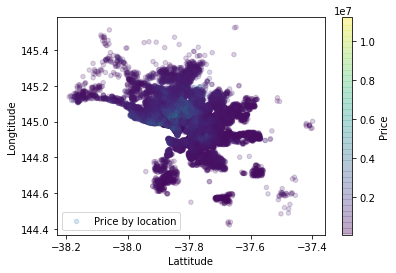

In [52]:
#visualize how geographical data looks like
df.plot(kind='scatter',x='Lattitude',y='Longtitude',c='Price',alpha=0.2,colorbar=True, sharex=False,label= 'Price by location', cmap=plt.get_cmap("viridis"))
plt.legend(fontsize=10)

This plot is quite confusing, because most values are in the low end of the Price range and they turn out as blue and it also most extreme outliers

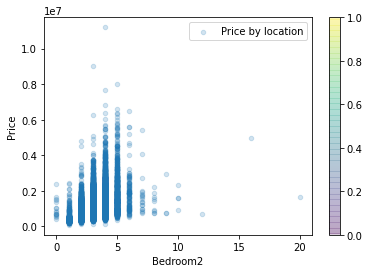

In [53]:
#lets visualize the bedroom2 vs Price
df.plot(kind='scatter',x='Bedroom2',y='Price',alpha=0.2,colorbar=True, sharex=False,label= 'Price by location', cmap="viridis")
plt.legend(fontsize=10)

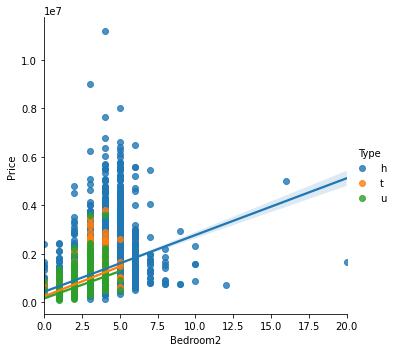

In [54]:
#Type impact on bedroom2 vs Price
sns.lmplot(data=df,x='Bedroom2',y="Price",hue="Type")

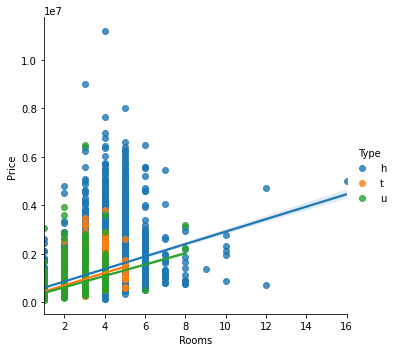

In [55]:
##Type impact on Rooms vs Price
sns.lmplot(data= df, x='Rooms', y= 'Price', hue='Type')

Houses are more expensive when compared to townhouses and single units. Here few outliers noticed in the dataset. All in all, not a very strong relation between prices and number of bedrooms

After carefully saw above graphs it can be noticed that variables "Rooms vs Price" and "Bedroom2 vs Price" are pretty much similar and one of the columns should be removed to avoid duplication of data. So we can drop Bedroom2 in later Feature engineering section